# <center> Laboratorium: Regresja </center>

# 1. Cel/Zakres
- Przypomnienie zasady działania i ograniczeń perceptronu
- Budowa sieci neuronowej przy pomocy Tensorflow/Keras
- Trening sieci i analiza wyników

In [ ]:
import pickle
import pandas as pd
import numpy as np
import tensorflow as tf

from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from tensorflow import keras

# 2. Zadania

## 2.1 Perceptrony i irysy

#### 2.1.1 Pobierz zbiór danych
- Zwróć uwagę, jak długość i szerokość płatka jest powiązana z gatunkiem irysów.

In [2]:
iris = load_iris(as_frame=True)

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

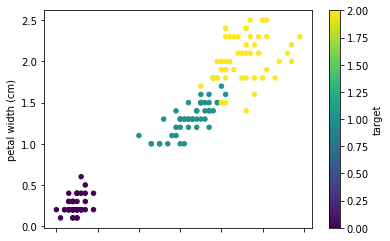

In [3]:
pd.concat([iris.data, iris.target], axis=1).plot.scatter(
    x="petal length (cm)", y="petal width (cm)", c="target", colormap="viridis"
)

#### 2.1.2 Podziel zbiór danych na zbiór uczący oraz zbiór testowy (8/2)
następnie kolejno dla każdego z gatunków (0, 1, 2):
- zbuduj perceptron
- przeprowadź jego uczenie
- oceń jego dokładność dla zbioru ***uczącego*** i dla zbioru ***testowego***.

In [4]:
X = iris.data[["petal length (cm)", "petal width (cm)"]]
y = iris.target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

_gatunek 0_

In [6]:
y_train_0 = (y_train == 0).astype(int)
y_test_0 = (y_test == 0).astype(int)

per_clf_0 = Perceptron()
per_clf_0.fit(X_train, y_train_0)

Perceptron()

In [7]:
y_train_0_pred = per_clf_0.predict(X_train)
y_test_0_pred = per_clf_0.predict(X_test)

a_tr_0 = accuracy_score(y_train_0, y_train_0_pred)
a_te_0 = accuracy_score(y_test_0, y_test_0_pred)

_gatunek 1_

In [8]:
y_train_1 = (y_train == 1).astype(int)
y_test_1 = (y_test == 1).astype(int)

per_clf_1 = Perceptron()
per_clf_1.fit(X_train, y_train_1)

Perceptron()

In [9]:
y_train_1_pred = per_clf_1.predict(X_train)
y_test_1_pred = per_clf_1.predict(X_test)

a_tr_1 = accuracy_score(y_train_1, y_train_1_pred)
a_te_1 = accuracy_score(y_test_1, y_test_1_pred)

_gatunek 2_

In [10]:
y_train_2 = (y_train == 2).astype(int)
y_test_2 = (y_test == 2).astype(int)

per_clf_2 = Perceptron()
per_clf_2.fit(X_train, y_train_2)

Perceptron()

In [11]:
y_train_2_pred = per_clf_2.predict(X_train)
y_test_2_pred = per_clf_2.predict(X_test)

a_tr_2 = accuracy_score(y_train_2, y_train_2_pred)
a_te_2 = accuracy_score(y_test_2, y_test_2_pred)

#### 2.1.3 Dla każdej z klas sprawdź wagę biasu (w_0) oraz poszczególnych wejść (w_1, w_2).
- Czy wartości te korespondują z tym co widzisz na obrazku?
- Czy, patrząc na ten obrazek, potrafisz wyjaśnić różnice w dokładności dla poszczególnych klas?

In [12]:
per_wght = []
perceptrons = [per_clf_0, per_clf_1, per_clf_2]

for perceptron in perceptrons:
    w_0 = perceptron.intercept_[0]
    w_1 = perceptron.coef_[0][0]
    w_2 = perceptron.coef_[0][1]
    per_wght.append((w_0, w_1, w_2))

In [13]:
per_wght

[(4.0, -1.4999999999999993, -1.6999999999999997),
 (-9.0, 6.800000000000028, -16.099999999999973),
 (-37.0, 1.8999999999999861, 21.499999999999993)]

#### 2.1.4 Dokładność dla każdej z klas zapisz jako krotkę ***(a_tr, a_te)***
wszystkie krotki zapisz w pliku:
- per_acc.pkl jako listę krotek: [(a_tr_0, a_te_0), (a_tr_1, a_te_1), (a_tr_2, a_te_2)].

In [14]:
per_acc = [(a_tr_0, a_te_0), (a_tr_1, a_te_1), (a_tr_2, a_te_2)]

In [15]:
per_acc

[(1.0, 1.0), (0.6416666666666667, 0.7), (0.85, 0.8666666666666667)]

In [16]:
with open("per_acc.pkl", 'wb') as f:
    pickle.dump(per_acc, f)

#### 2.1.5 Podobnie, wagi dla poszczególnych trzech klas
zapisz jako listę 3-elementowych krotek (w_0, w_1, w_2) w pliku:
- per_wght.pkl.

In [17]:
with open("per_wght.pkl", 'wb') as f:
    pickle.dump(per_wght, f)

## 2.2 Perceptron i XOR

#### 2.2.1 Przygotuj prosty zbiór danych modelujący operację XOR.

In [18]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

#### 2.2.2 Utwórz i przeprowadź uczenie perceptronu dla tych danych.
- Czy jest zdolny do poprawnego przeprowadzenia predykcji? Jak wyglądają jego wagi?

In [19]:
per_clf_xor = Perceptron()
per_clf_xor.fit(X, y)
y_pred = per_clf_xor.predict(X)
print(accuracy_score(y, y_pred))

print(per_clf_xor.intercept_)
print(per_clf_xor.coef_)

0.5
[0.]
[[0. 0.]]


## 2.3 XOR, drugie podejście

Problem klasyfikacji XOR teoretycznie da się rozwiązać przy pomocy sieci przedstawionej na
poniższym rysunku.

![](Picture.png "")

#### 2.3.1 Zamodeluj sieć neuronową (perceptron wielowarstwowy, MLP)
- zgodnie z powyższym rysunkiem przy pomocy Tensorflow/Keras.

- Sieć powinna posiadać dwie warstwy gęste:

     ***warstwę ukrytą***, składającą się z dwóch neuronów, o dwóch wejściach (input_dim) i funkcji
aktywacji tanh,

     ***warstwę wyjściową***, zawierającą jeden neuron i sigmoidalnej funkcji aktywacji.

In [20]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(2, activation='tanh', use_bias=True , input_dim=2))
model.add(keras.layers.Dense(1, activation='sigmoid', use_bias=True))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


#### 2.3.2 Skompiluj model
Powinien on zawierać ***entropie krzyżową*** jako funkcją straty,<br/> oraz ***stochastyczny optymalizator gradientowy*** o domyślnych parametrach.

In [22]:
model.compile(loss='binary_crossentropy',
              optimizer='sgd')

#### 2.3.3 Przeprowadź uczenie przez 100 epok
- Wyświetl historię wartości funkcji straty.
- Jaka byłaby jej pożądana wartość dla rozważanego problemu?

In [23]:
history = model.fit(X, y, epochs=100, verbose=False)
print(history.history['loss'])

[0.6960448026657104, 0.6959807276725769, 0.6959170699119568, 0.6958535313606262, 0.6957902908325195, 0.6957273483276367, 0.695664644241333, 0.6956021785736084, 0.6955399513244629, 0.695478081703186, 0.6954163312911987, 0.6953549385070801, 0.6952937841415405, 0.6952328085899353, 0.695172131061554, 0.6951117515563965, 0.6950514912605286, 0.6949915289878845, 0.6949317455291748, 0.6948723196983337, 0.6948130130767822, 0.6947540044784546, 0.694695234298706, 0.6946366429328918, 0.6945782899856567, 0.6945201754570007, 0.6944622993469238, 0.6944046020507812, 0.6943471431732178, 0.6942899227142334, 0.6942328214645386, 0.6941760182380676, 0.694119393825531, 0.6940629482269287, 0.6940067410469055, 0.6939507722854614, 0.6938949823379517, 0.693839430809021, 0.6937839984893799, 0.6937288045883179, 0.6936737895011902, 0.6936190128326416, 0.6935644149780273, 0.6935099363327026, 0.6934557557106018, 0.6934016942977905, 0.6933478116989136, 0.6932941675186157, 0.6932407021522522, 0.6931873559951782, 0.693

#### 2.3.4 Sparwdź, jak sieć radzi sobie z klasyfikacją zbioru X.
- Czy wyniki są zadowalające?
- Powtórz cały proces (wraz z tworzeniem modelu) kilka razy. Czy wyniki są różne? Dlaczego?

In [24]:
model.predict(X)

array([[0.49242565],
       [0.39441568],
       [0.58686537],
       [0.46275082]], dtype=float32)

#### 2.3.5 Poeksperymentuj z hiperparametrami modelu:
- spróbuj zmienić optymalizator z SGD na Adam,
- sprawdź działanie z różnymi wartościami kroku optymalizatora (learning_rate),
- wypróbuj inne funkcje straty (np. MAE) oraz funkcje aktywacji poszczególych warstw.
<br/><br/>
- Czy teraz częściej pojawiają się rozwiązania satysfakcjonujące (czyli dające predykcje bliskie
[0, 1, 1, 0])?

In [25]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(2, activation='tanh', use_bias=True , input_dim=2))
model.add(keras.layers.Dense(1, activation='sigmoid', use_bias=True))
model.compile(loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.05))

model.fit(X, y, epochs=100, verbose=False)
model.predict(X)

array([[0.03925857],
       [0.9824331 ],
       [0.98325515],
       [0.02994084]], dtype=float32)

In [26]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(2, activation='tanh', use_bias=True , input_dim=2))
model.add(keras.layers.Dense(1, activation='sigmoid', use_bias=True))
model.compile(loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.02))

model.fit(X, y, epochs=100, verbose=False)
model.predict(X)

array([[0.14297765],
       [0.8436408 ],
       [0.813978  ],
       [0.08319139]], dtype=float32)

In [27]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(2, activation='relu', use_bias=True , input_dim=2))
model.add(keras.layers.Dense(1, activation='sigmoid', use_bias=True))
model.compile(loss="mean_absolute_error",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.05))

model.fit(X, y, epochs=100, verbose=False)
model.predict(X)

array([[0.5],
       [0.5],
       [0.5],
       [0.5]], dtype=float32)

In [28]:
model_ = keras.models.Sequential()

model_.add(keras.layers.Dense(2, activation='tanh', use_bias=True , input_dim=2))
model_.add(keras.layers.Dense(1, activation='sigmoid', use_bias=True))
model_.compile(loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.05))

model_.fit(X, y, epochs=100, verbose=False)
model_.predict(X)

array([[0.01233867],
       [0.9810636 ],
       [0.49710226],
       [0.50673777]], dtype=float32)

#### 2.3.6 UZYSKAJ ZATYSFAKCJOUJĄCY MODEL („zera” < 0.1, „jedynki” > 0.9)
- pobierz jego wagi przy pomocy funkcji ***get_weights()****. Zapisz jej wyjście do pliku mlp_xor_weights.pkl.

In [29]:
satisfying = False

while not satisfying:
    model_ = keras.models.Sequential()

    model_.add(keras.layers.Dense(2, activation='tanh', use_bias=True , input_dim=2))
    model_.add(keras.layers.Dense(1, activation='sigmoid', use_bias=True))
    model_.compile(loss="binary_crossentropy",
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.05))

    history = model_.fit(X, y, epochs=100, verbose=False)
    y_pred = model_.predict(X)
    if y_pred[0]<0.1 and y_pred[1]>0.9 and y_pred[2]>0.9 and y_pred[3]<0.1:
        satisfying = True

In [30]:
y_pred

array([[0.02180028],
       [0.96671855],
       [0.96792805],
       [0.01890549]], dtype=float32)

In [31]:
mlp_xor_weights = model_.get_weights()

In [32]:
with open("mlp_xor_weights.pkl", 'wb') as f:
    pickle.dump(mlp_xor_weights, f)